In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [74]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15.7,12.27)})


In [3]:
def extract_date(data):
    date, _ = data.split(' ')
    return date

In [12]:
data = pd.read_csv('../data/master.csv')

In [137]:
data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,15204,15205,15206,15207,15208,15209,15210,15211,15212,15213
Case-Id,232,425,728,978,11,40,46,51,67,68,...,1047,1048,1048,1048,1049,1049,1049,1049,1049,1049
Case-concept:name,XH,JP,ABA,QKA,K,NaN,TA,YA,OB,PB,...,INA,JNA,JNA,JNA,KNA,KNA,KNA,KNA,KNA,KNA
Event-Id,3078,6195,10599,14200,132,455,521,562,746,760,...,15193,15194,15195,15196,15197,15198,15199,15203,15204,15205
sorting,20,5,6,4,6,14,8,4,14,12,...,3,1,2,3,1,2,3,7,8,9
timestamp,2014-03-27 09:00:00,2014-05-03 18:26:00,2014-10-12 10:10:00,2013-11-16 08:21:00,2014-02-23 21:15:00,2014-11-13 06:00:00,2014-08-10 06:00:00,2014-07-10 10:54:00,2014-12-12 06:00:00,2015-01-19 10:00:00,...,2014-11-03 09:45:51,2014-11-12 16:40:19,2014-11-12 16:47:25,2014-11-12 16:47:39,2014-12-11 22:28:38,2014-12-11 22:52:48,2014-12-11 22:53:16,2014-12-12 04:03:38,2014-12-12 04:03:43,2014-12-12 04:06:38


In [13]:
data['date'] = data['timestamp'].apply(lambda x : extract_date(x))
data['date'] =  pd.to_datetime(data['date'])
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [139]:
columns_select = ['date', 'Case-Id']
ts_data = data[columns_select]
len(ts_data['Case-Id'].unique())

1050

In [141]:
#data.shape

In [96]:
date_df = ts_data.groupby(['date'], ).sum()

In [142]:
#date_df

In [98]:
#sns.tsplot(data=date_df)

In [99]:
date_df.index

DatetimeIndex(['2013-11-07', '2013-11-08', '2013-11-09', '2013-11-11',
               '2013-11-12', '2013-11-13', '2013-11-14', '2013-11-16',
               '2013-11-17', '2013-11-18',
               ...
               '2015-04-18', '2015-04-22', '2015-04-29', '2015-05-04',
               '2015-05-05', '2015-05-07', '2015-05-09', '2015-05-30',
               '2015-06-04', '2015-06-05'],
              dtype='datetime64[ns]', name='date', length=504, freq=None)

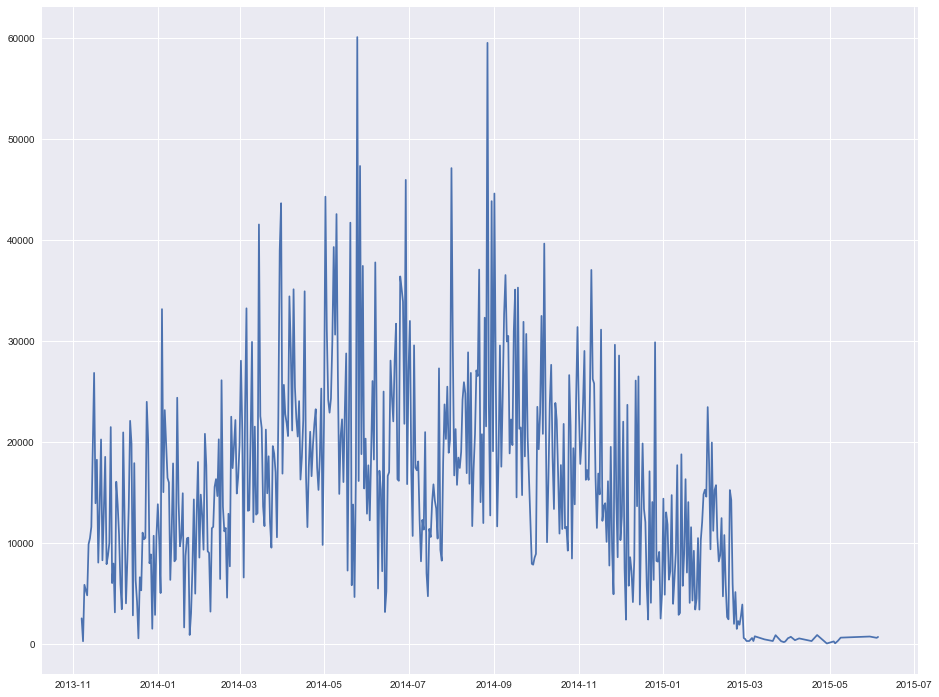

In [100]:
# [(date_df.index.year > 2013) | (date_df.index.year < 2014)]
plt.plot(date_df) 

In [95]:
# Use 2014 to build model
# use 2015 to test

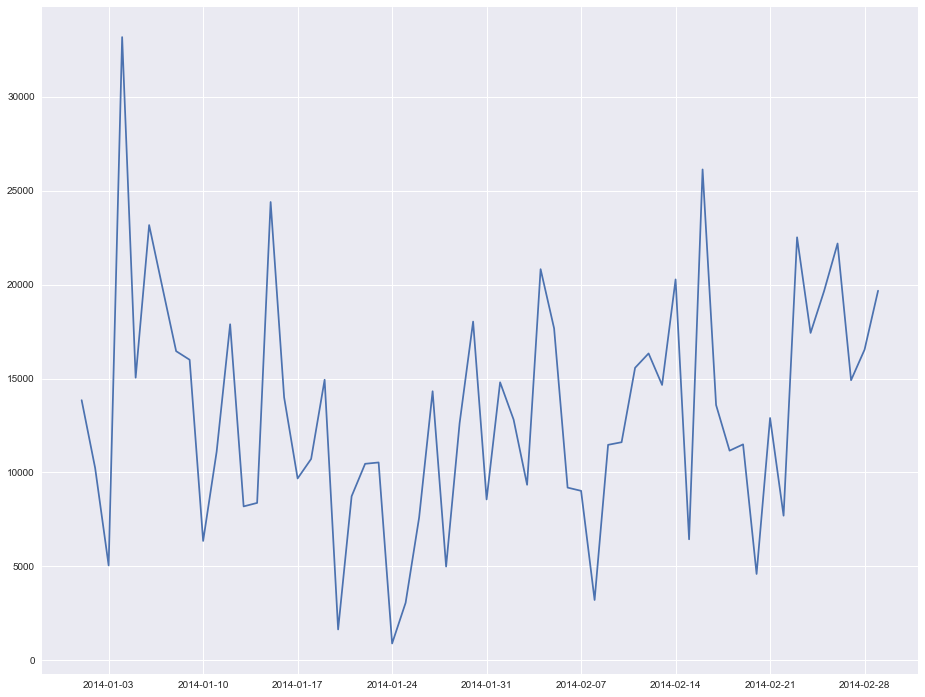

In [86]:
df_sub = date_df['2014-01-01':'2014-03-01']
plt.plot(df_sub) 

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose
date_df = ts_data.groupby(['date']).sum()

In [133]:
date_df.head()

,Case-Id
date,
2013-11-07,2547
2013-11-08,283
2013-11-09,5868
2013-11-11,4824
2013-11-12,9889


In [134]:
decomposition = seasonal_decompose(date_df['Case-Id'], freq=30)

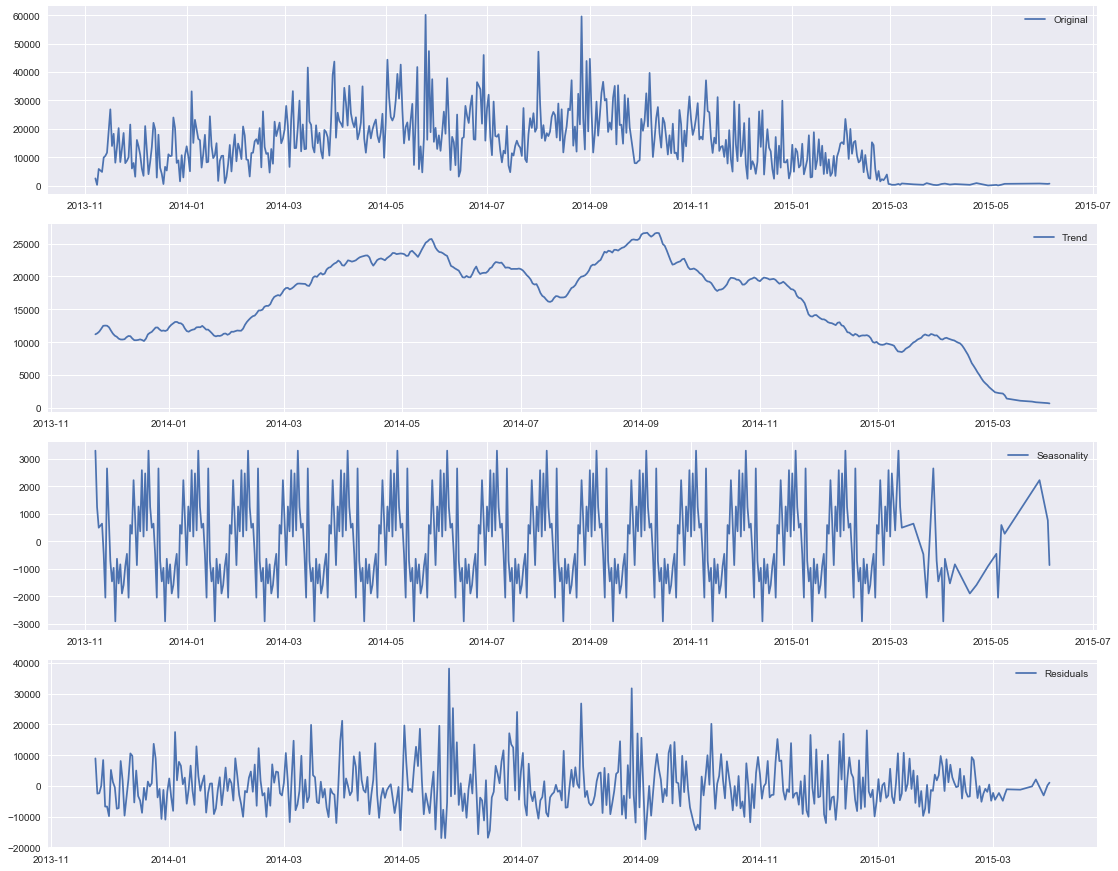

In [135]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(date_df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()